<a href="https://colab.research.google.com/github/valentingracia/codingDojoDC/blob/main/pcaTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
# cargar el conjunto de datos
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
from sklearn.datasets import fetch_openml




In [148]:
mnist = fetch_openml('mnist_784')
# ver la forma del conjunto de datos
mnist.data.shape

(70000, 784)

In [149]:
X=pd.DataFrame(data=mnist.data)
y=mnist.target

In [150]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

Escaladores

In [151]:
# Instantiar Escalador Estándar
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df = scaler.fit_transform(X)

In [152]:
# Instanciar y ajustar datos usando PCA
pca = PCA()
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Proportion of Explained Variance')

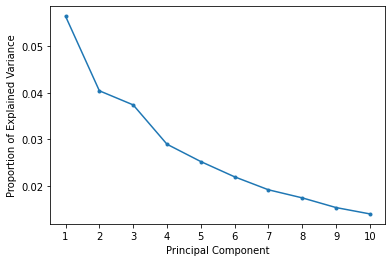

In [153]:
# Graficar los ratios de varianza explicadas de los primeros 10 componentes principales
plt.plot(range(1, 11), pca.explained_variance_ratio_[:10], marker = '.')
plt.xticks(ticks = range(1, 11))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

Ok aqui concluimos que el numero ideal de PCAs es 4,

empezamos con nuevo modelo

In [154]:
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

escalado para modelo predictivo

In [155]:
# Instanciar Escalador Estándar
scaler = StandardScaler()
# Ajustar y transformar datos
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [156]:
# Ajustar PCA
pca = PCA(n_components = 4)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)
# ajustar regresión logística
rf= RandomForestClassifier()
rf.fit(X_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [158]:
print('Training accuracy:', rf.score(X_train_pca, y_train))
print('Testing accuracy:', rf.score(X_test_pca, y_test))

Training accuracy: 0.9996571428571429
Testing accuracy: 0.6790285714285714
